In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

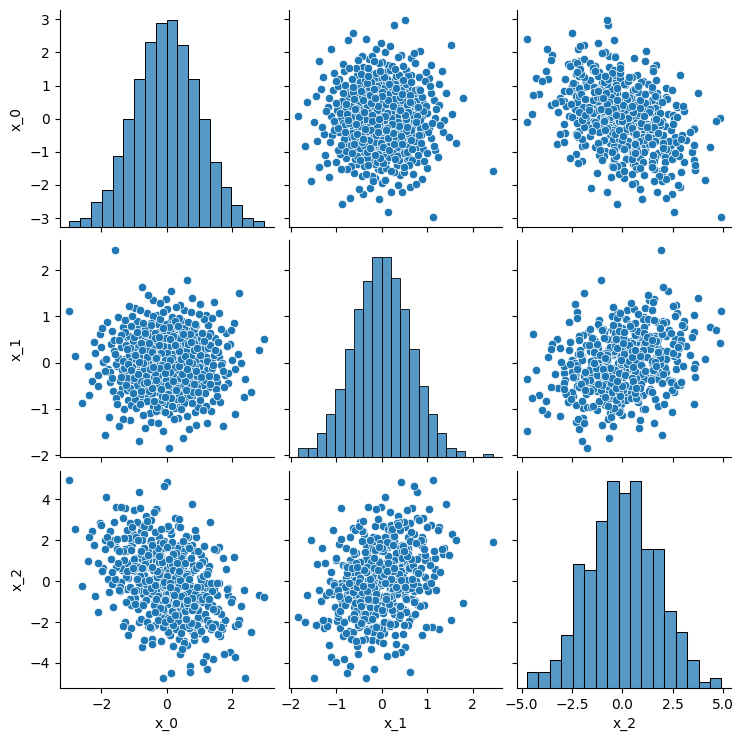

In [2]:
from scipy.stats.qmc import MultivariateNormalQMC
from tklds.interface.generators import create_sobol_lds_engine, get_sequence_enum

d = 3
scramble = True
sequence_enum = get_sequence_enum()

sobol_engine = create_sobol_lds_engine(sequence_enum.TKRG_A_AP5, d=d, scramble=scramble)


mean = np.zeros(d)

cov = np.array([
    [1.0, 0.0, -0.7],
    [0.0, 0.4, 0.3],
    [-0.7, 0.3, 3.0]
])
sobol_engine.fast_forward(n=1)


dist = MultivariateNormalQMC(mean=mean, cov=cov, engine=sobol_engine)

n_samples = 512
sample = dist.random(n_samples)


df = pd.DataFrame({f"x_{i}": sample[:,i] for i in range(d)})

sns.pairplot(df)

<BarContainer object of 3 artists>

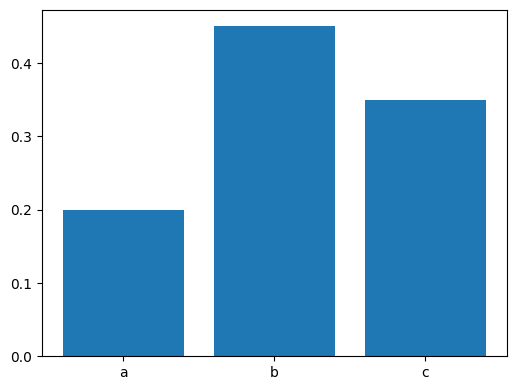

In [3]:
from scipy.stats.qmc import MultinomialQMC
from tklds.interface.generators import create_sobol_lds_engine

d = 1
scramble = True

sobol_engine = create_sobol_lds_engine(sequence_enum.TKRG_A_AP5, d=d, scramble=scramble)
sobol_engine.fast_forward(n=1)

dist = MultinomialQMC(pvals = [0.2, 0.45, 0.35], engine=sobol_engine)

n_samples = 1024
probabilities = dist.random(n_samples)/n_samples

sf, fs = 1.5, 15 
fig,ax = plt.subplots(1,figsize=(sf*4,sf*3))
ax.bar(["a","b","c"], height=probabilities)

In [4]:
from tklds.interface.generators import create_sobol_lds_engine

d = 5

sobol_engine = create_sobol_lds_engine(sequence_enum.TKRG_A_AP5, d=d, scramble=False)
u = sobol_engine.random(8)
print(f"Sobol sequence: \n{u} \n")

sobol_engine_scramble = create_sobol_lds_engine(sequence_enum.TKRG_A_AP5, d=d, scramble=True)
u_scrambled = sobol_engine_scramble.random(8)
print(f"Sobol sequence (scrambled): \n´{u_scrambled}")


Sobol sequence: 
[[0.    0.    0.    0.    0.   ]
 [0.5   0.5   0.5   0.5   0.5  ]
 [0.75  0.25  0.75  0.75  0.25 ]
 [0.25  0.75  0.25  0.25  0.75 ]
 [0.375 0.625 0.625 0.375 0.375]
 [0.875 0.125 0.125 0.875 0.875]
 [0.625 0.875 0.375 0.625 0.125]
 [0.125 0.375 0.875 0.125 0.625]] 

Sobol sequence (scrambled): 
´[[5.10628968e-01 3.50587320e-01 9.95926559e-04 2.35628506e-01
  3.97707054e-01]
 [2.60487199e-01 8.54025662e-01 7.08534837e-01 5.51798105e-01
  5.65696657e-01]
 [6.59792125e-03 2.12971345e-01 9.40413535e-01 9.98976827e-01
  3.47429104e-02]
 [7.56465673e-01 7.10513234e-01 2.71930575e-01 3.07318896e-01
  9.91786420e-01]
 [8.89089167e-01 8.86887133e-01 6.23393774e-01 3.77794236e-01
  2.25703746e-01]
 [1.38862953e-01 3.76624256e-01 1.66831180e-01 8.18963826e-01
  7.99910069e-01]
 [3.77253234e-01 5.48070192e-01 4.35196429e-01 6.38088763e-01
  3.31839561e-01]
 [6.27021313e-01 5.93137443e-02 8.52703512e-01 7.14308321e-02
  6.32601738e-01]]
